In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/perdue/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import re

In [3]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [4]:
from matplotlib import rcParams
rcParams.update({'font.size': 22})

In [5]:
epoch_decoder = re.compile(r'^Epoch [0-9]+ of [0-9]+ took')
integer_pattern = re.compile(r'[0-9]+')
floating_pattern = re.compile(r'[0-9]+\.[0-9]+')

In [6]:
def extract_arrays(filename):
    epoch = []
    training_loss = []
    validation_loss = []
    validation_accuracy = []
    with open(filename, 'r') as f:
        for line in f.readlines():
            if line[0] == '#':
                continue
            data = line.split(',')
            # we could search each bit of the data for strings (e.g., `epoch_decoder`), but we will
            # be lazy for now and assume the orderind is always the same...
            epoch.append(int(integer_pattern.findall(data[0])[0]))
            training_loss.append(float(floating_pattern.findall(data[1])[0]))
            validation_loss.append(float(floating_pattern.findall(data[2])[0]))
            validation_accuracy.append(float(floating_pattern.findall(data[3])[0]))
    return epoch, training_loss, validation_loss, validation_accuracy

In [7]:
epsilon_11_me1Amc_file = 'minerva_tricolumnar_spacetime_epsilon_11_me1Amc_20161123_multijob.log'
ep11_me1Amc_epoch, ep11_me1Amc_training_loss, ep11_me1Amc_validation_loss, ep11_me1Amc_validation_accuracy = \
    extract_arrays(epsilon_11_me1Amc_file)

#epsilon_11_me1Amc_epoch = []
#epsilon_11_me1Amc_training_loss = []
#epsilon_11_me1Amc_validation_loss = []
#epsilon_11_me1Amc_validation_accuracy = []
#with open(epsilon_11_me1Amc_file, 'r') as f:
#    for line in f.readlines():
#        if line[0] == '#':
#            continue
#        data = line.split(',')
#        # we could search each bit of the data for strings (e.g., `epoch_decoder`), but we will
#        # be lazy for now and assume the orderind is always the same...
#        epsilon_11_me1Amc_epoch.append(int(integer_pattern.findall(data[0])[0]))
#        epsilon_11_me1Amc_training_loss.append(float(floating_pattern.findall(data[1])[0]))
#        epsilon_11_me1Amc_validation_loss.append(float(floating_pattern.findall(data[2])[0]))
#        epsilon_11_me1Amc_validation_accuracy.append(float(floating_pattern.findall(data[3])[0]))

In [8]:
ep11_me1Amc_validation_accuracy

[95.99,
 96.24,
 96.46,
 96.59,
 96.69,
 96.82,
 96.89,
 96.94,
 97.0,
 97.02,
 97.11,
 97.15,
 97.14,
 97.18,
 97.15,
 97.22,
 97.24,
 97.26,
 97.31,
 97.24,
 97.33,
 97.33,
 97.35,
 97.36,
 97.33,
 97.41,
 97.4,
 97.41,
 97.43]

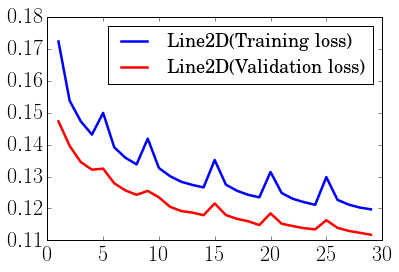

In [11]:
plot1, = plt.plot(ep11_me1Amc_epoch, ep11_me1Amc_training_loss, 
                  linewidth=2.5, linestyle='-', color='blue', label='Training loss')
plot2, = plt.plot(ep11_me1Amc_epoch, ep11_me1Amc_validation_loss, 
                  linewidth=2.5, linestyle='-', color='red', label='Validation loss')
plt.legend([plot1, plot2], loc='upper right', fontsize='small')
plt.show()

In [12]:
def make_loss_plots(epochs, training_loss, validation_loss, validation_accuracy, loss_title, accuracy_title, pdfname):
    fig = plt.figure(figsize=(22,12))
    gs = plt.GridSpec(1, 2)

    ax = plt.subplot(gs[0])
    plot1, = plt.plot(epochs, training_loss, 
                      linewidth=2.5, linestyle='-', color='blue', label='Training loss')
    plot2, = plt.plot(epochs, validation_loss, 
                      linewidth=2.5, linestyle='-', color='red', label='Validation loss')
    plt.title(loss_title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    ax = plt.subplot(gs[1])
    plot1, = plt.plot(epochs, validation_accuracy, 
                      linewidth=2.5, linestyle='-', color='red', label='Validation accuracy')
    plt.title(accuracy_title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    fig.savefig(pdfname, bbox_inches='tight')

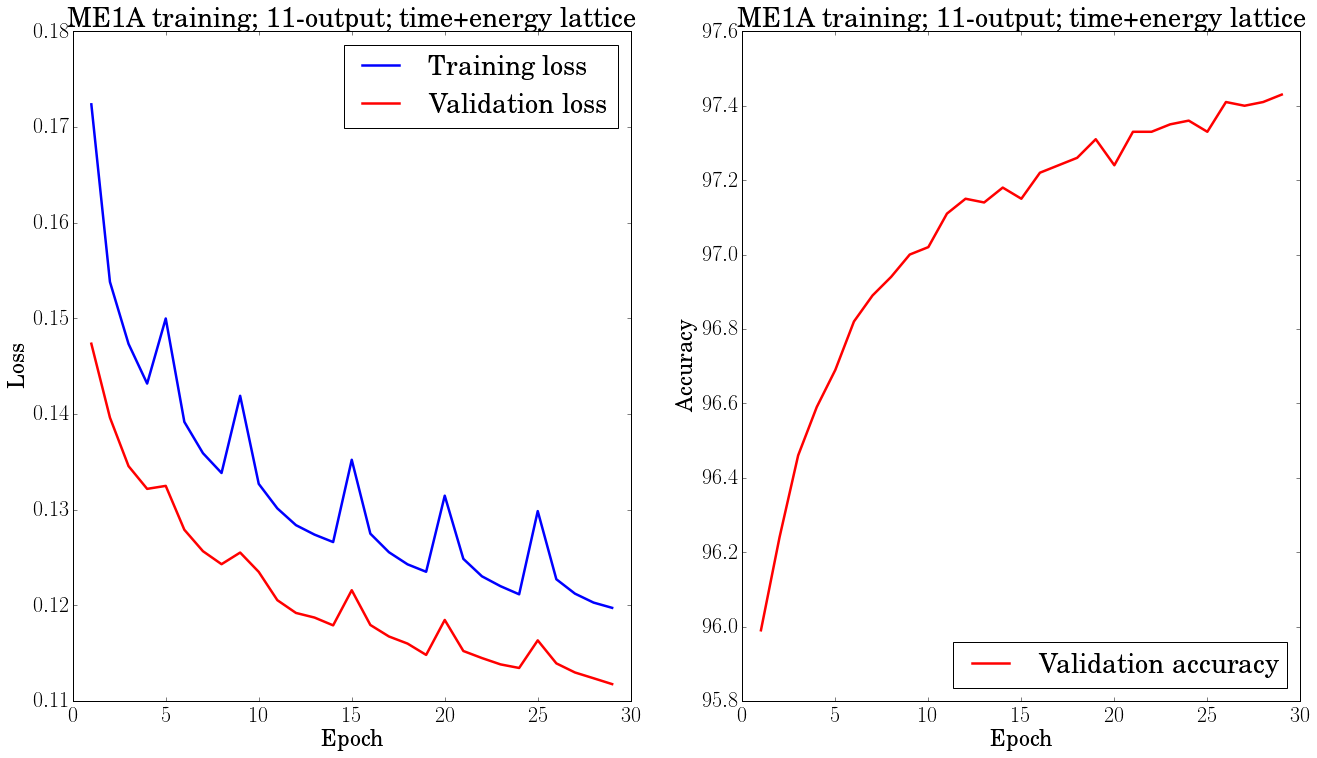

In [13]:
make_loss_plots(ep11_me1Amc_epoch, ep11_me1Amc_training_loss, ep11_me1Amc_validation_loss, ep11_me1Amc_validation_accuracy,
               'ME1A training; 11-output; time+energy lattice',
               'ME1A training; 11-output; time+energy lattice',
               'ztemp.pdf')

In [14]:
epsilon_11_me1Bmc_file = 'minerva_tricolumnar_spacetime_epsilon_11_me1Bmc_20161103_multijob.log'
ep11_me1Bmc_epoch, ep11_me1Bmc_training_loss, ep11_me1Bmc_validation_loss, ep11_me1Bmc_validation_accuracy = \
    extract_arrays(epsilon_11_me1Bmc_file)

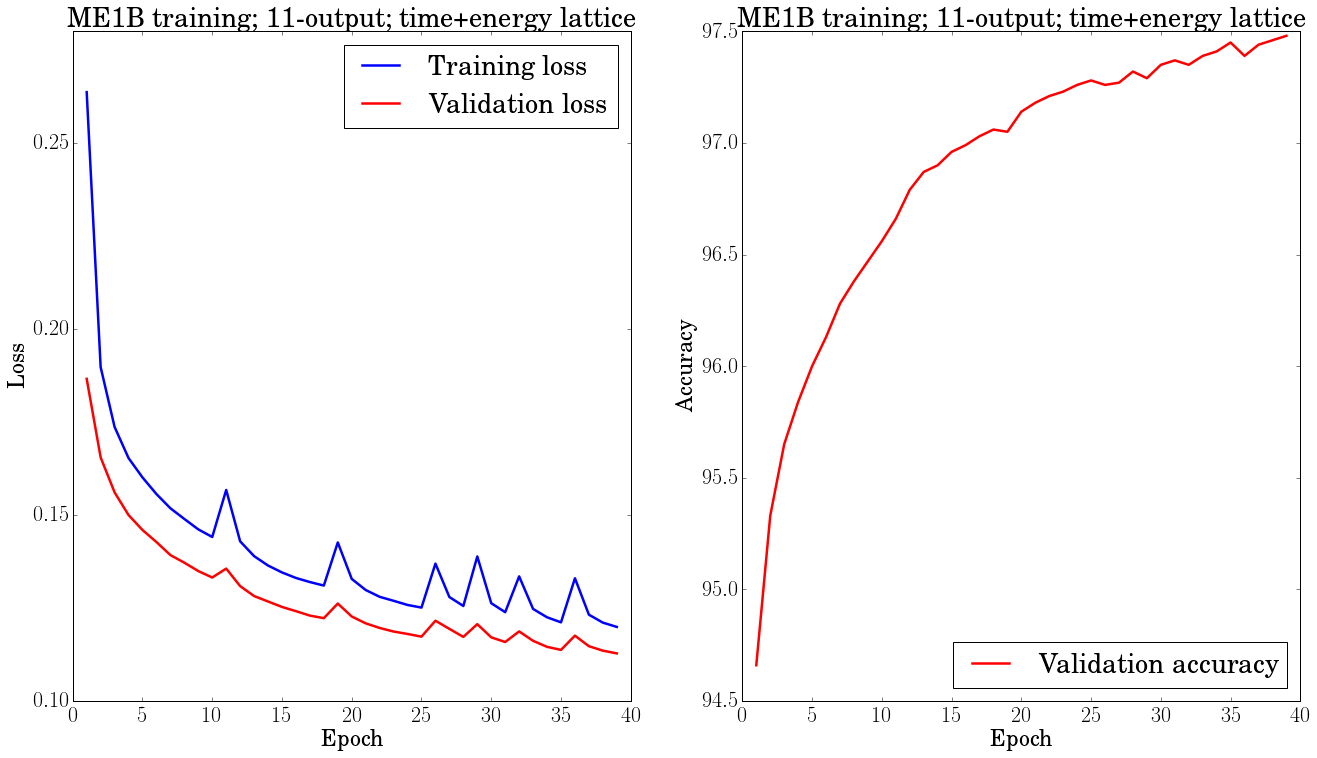

In [15]:
make_loss_plots(ep11_me1Bmc_epoch, ep11_me1Bmc_training_loss, ep11_me1Bmc_validation_loss, ep11_me1Bmc_validation_accuracy,
               'ME1B training; 11-output; time+energy lattice',
               'ME1B training; 11-output; time+energy lattice',
               'ztemp.pdf')

In [16]:
epsilon_67_me1Bmc_file = 'minerva_tricolumnar_spacetime_epsilon_67_me1Bmc_20161216_multijob.log'
ep67_me1Bmc_epoch, ep67_me1Bmc_training_loss, ep67_me1Bmc_validation_loss, ep67_me1Bmc_validation_accuracy = \
    extract_arrays(epsilon_67_me1Bmc_file)

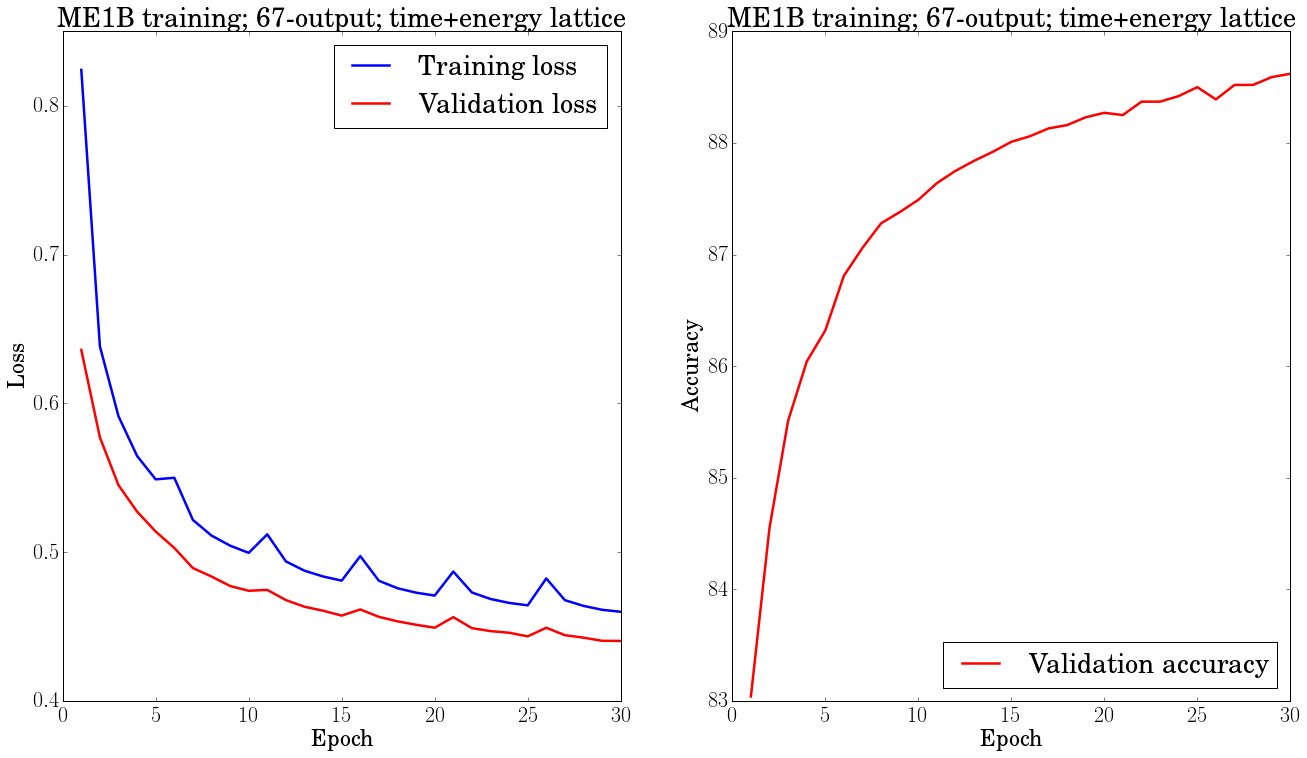

In [17]:
make_loss_plots(ep67_me1Bmc_epoch, ep67_me1Bmc_training_loss, ep67_me1Bmc_validation_loss, ep67_me1Bmc_validation_accuracy,
               'ME1B training; 67-output; time+energy lattice',
               'ME1B training; 67-output; time+energy lattice',
               'ztemp.pdf')